$$
D(\omega_{choose}, k_{find})=0
$$

Find $k$

$$
\vec{\vec{D}}(\omega, k)\cdot \vec E=\vec0
$$
Find the nullspace of $\vec{\vec{D}}(\omega, k)$ gives you $\vec E$ and hence relative amplitudes of the components of the electric field.

For the extraordinary mode
$$
n^2=\frac{\epsilon_\bot^2-g^2}{\epsilon_\bot}\\
E_x\propto i g\\
E_y\propto -\epsilon_\bot
$$
where $n=kc/\omega$
$$
\epsilon_\bot = 1- \sum_s \frac{\Pi_s^2}{\omega^2 - \Omega_s^2},\\
g = -\sum_s \frac{\Pi_s^2\Omega_s}{\omega (\omega^2 - \Omega_s^2)}
$$
Hence find $k_\alpha$ and $k_\beta$ associated with $\omega_\alpha$ and $\omega_\beta = \omega_\alpha + \Omega_i$ respectively. 

Choose $\omega_\alpha=\omega_L+ \Delta\omega$ where $\Delta \omega$ is a tuning parameter to find the right mode and to fix the wavenumber at something sensible. $\omega_L\approx \sqrt{\frac{\Omega_e^2}{4}+\Pi_e^2} + \frac{\Omega_e}{2}$ (where $\Omega_e < 0$)

Now the other parameters:

Faraday's
$$
-i\omega\vec B_1 = - \vec k \times \vec E_1
$$
Gauss's law
$$
i\vec k \cdot \vec E_1 =  \sum_s\frac{q_s n_{s,1}}{\epsilon_0}\\
$$
Ampere's law:
$$
\mu_0 \vec J = i \vec k \times \vec {B}_1 + i \omega \mu_0 \epsilon_0 \vec E_1\\
\sum_s q_s n_{s,0} \vec {v}_{s,1} = \frac{i \vec k \times \vec {B}_1}{\mu_0} + i \omega \epsilon_0 \vec E_1\\
$$
Assume the ions are unperturbed in the initial conditions
$$
q_e n_{e,0} {v}_{e,1,y} = i  \omega \epsilon_0 E_{1,x}\\
q_e n_{e,0} {v}_{e,1,y} = -\frac{i k {B}_{1,z}}{\mu_0} + i \omega \epsilon_0 E_{1,y}\\
q_e n_{e,0} {v}_{e,1,z} = \frac{i k {B}_{1,y}}{\mu_0} + i \omega \epsilon_0 E_{1,z}\\
$$

$$
n_{e,1} = i k E_{x,1}\frac{\epsilon_0}{q_s}
$$

Continuity

$$
\omega n_{1,s} - n_{0,s} \vec k \cdot \vec v_{1,s} = 0
$$




In [1]:
using Roots, LinearAlgebra, Plots, IntervalArithmetic, IntervalRootFinding

const c = 2.99792458e8
const ϵ₀ = 8.854187817e-12
const μ₀ = 1.25663706144e-6
const q₀ = 1.602176487e-19
const mₑ = 9.10938188e-31
const n0 = 1e19
const B0 = 2.0
fΠ(n, Z=-1) = √((Z * q₀)^2 * n / mₑ / ϵ₀)
const Π = fΠ(n0)
const Ω = -q₀ * B0 / mₑ
const mi = 1836 * mₑ
const Ωi = q₀ * B0 / mi
fωL(n) = sqrt(Ω^2 / 4 + fΠ(n)^2) + Ω / 2
const ωL = fωL(n0)
fωₕ(n) = √(fΠ(n)^2 + Ω^2)
const ωₕ = √(fΠ(n0)^2 + Ω^2)
const Te_eV = 10e3
const vth = sqrt(2 * 10e3 * q₀ / mₑ)
fλD(n) = vth / fΠ(n)
const λD = fλD(n0)
const bulkenergy = B0^2 / 2μ₀ + n0 * 2Te_eV * q₀
g(ω) = Π^2 * Ω / ω / (ω^2 - Ω^2)
ϵ⊥(ω) = 1 - Π^2 / (ω^2 - Ω^2)
g(ω, n) = fΠ(n)^2 * Ω / ω / (ω^2 - Ω^2)
ϵ⊥(ω, n) = 1 - fΠ(n)^2 / (ω^2 - Ω^2)
Dxwave(ω, k, n=n0) = ϵ⊥(ω, n) * ((c*k/ω)^2 - ϵ⊥(ω, n)) + g(ω, n)^2
Dxwaveguess(ω, n=n0) = (ω / c) * (1 - fΠ(n0)^2 / ω^2 * (ω^2 - fΠ(n0)^2) / (ω^2 - fωₕ(n)^2))
kguess(ω) = ω / c * √(1 - Π^2 / ω^2 / (1 + Ω / ω))
fEx(ω, n) = im * g(ω, n)
fEy(ω, n) = -ϵ⊥(ω, n)
fE(ω, k, n) = [fEx(ω, n), fEy(ω, n), 0]
fB(ω, k, n) = im * cross([k, 0, 0], fE(ω, k, n)) / ω
fJ(ω, k, n) = im * cross([k, 0, 0], fB(ω, k, n)) / μ₀ + im * ω * ϵ₀ * fE(ω, k, n)
fV(ω, k, n, Z=-1) = Z * fJ(ω, k, n) / q₀ / n0
fn(ω, k, n, Z=-1) = Z * im * k * fEx(ω, n) * ϵ₀ / q₀
@show Ω, bulkenergy

(Ω, bulkenergy) = (-3.5176404021828094e11, 1.6235929606537826e6)


(-3.5176404021828094e11, 1.6235929606537826e6)

In [2]:
function findω(k)
  return Roots.fzero(ω->Dxwave(ω, k), (ωL + ωₕ)/2)
end
function findk(ω)
  return Roots.fzero(k->Dxwave(ω, k), fΠ(1e19) / c)
end
vthi = sqrt(Te_eV * q₀ * 2 / mi)
rli = vthi / Ωi
vthe = sqrt(Te_eV * q₀ * 2 / mₑ)
rle = vthe / abs(Ω)

NG = 8 * 1024
dx = min(λD, rle)
Lx = NG * dx
Kl = 2π / Lx
ωstart = Π*0.5 # if it doesn't converge, try tweaking this value in range [0.1, 10]
ωmid = (fωL(n0) + fωₕ(n0))/2
nka = 16
ka = nka * Kl
function findn(n1)
  ωa = Roots.fzero(ω->Dxwave(ω, ka, n1[1] * n0), ωstart)
  ωtarget = ωa + Ωi
  kb = Roots.fzero(k->Dxwave(ωtarget, k, n1[1] * n0), ka)
  nkb = nka + (kb - ka) / Kl
  return abs(nkb - nka - 1)
end

n01 = Roots.fzero(findn, 1) * n0
ωa = Roots.fzero(ω->Dxwave(ω, nka * Kl, n01), ωstart)
ωb = Roots.fzero(ω->Dxwave(ω, (nka + 1) * Kl, n01), ωstart)
ka = Roots.fzero(k->Dxwave(ωa, k, n01), nka * Kl)
kb = Roots.fzero(k->Dxwave(ωb, k, n01), nka * Kl)
ωb = Roots.fzero(ω->Dxwave(ω, (nka + 1) * Kl, n01), ωstart)
@assert Roots.fzero(k->Dxwave(ωa, k, n01), ka * 1.2) ≈ ka

@show (ωb - ωa) / Ωi
@show ka / Kl, kb / Kl
@show ωa / Π, ωb / Π
@show n01
@show Lx / rli, rli/dx
@show Lx / rle, rle/dx


(ωb - ωa) / Ωi = 0.9970423081191179
(ka / Kl, kb / Kl) = (15.997075041717258, 16.997118574737335)
(ωa / Π, ωb / Π) = (0.7116767353045457, 0.712747516700042)
n01 = 1.8814296080116097e19
(Lx / rli, rli / dx) = (191.18490747262425, 42.848570571257106)
(Lx / rle, rle / dx) = (8192.0, 1.0)


(8192.0, 1.0)

In [3]:
function findpolarisation(ω, k, n)
  Ep = fE(ω, k, n)
  Bp = fB(ω, k, n)
  Vp = fV(ω, k, n)
  np = fn(ω, k, n)
 return (E=Ep, B=Bp, ve=Vp, ne=np)
end
pa = findpolarisation(ωa, ka, n01)
pb = findpolarisation(ωb, kb, n01)


(E = ComplexF64[0.0 + 1.5399408470104272im, -1.5566469647887018 + 0.0im, 0.0 + 0.0im], B = ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, -0.0 - 9.465723867014511e-10im], ve = ComplexF64[1.0821056442530328 - 0.0im, 0.03635168634458385 + 1.0938449161715107im, -0.0 - 0.0im], ne = 6.58011318888057e9 + 0.0im)

In [4]:
function scale(polarisation, factor)
  return NamedTuple(k=>factor * v for (k, v) in pairs(polarisation))
end
function energy(polarisation)
  E = polarisation[:E]
  B = polarisation[:B]
  ve = polarisation[:ve]
  return real(ϵ₀ * dot(E,E) / 2 + dot(B,B) / 2μ₀ + mₑ * n0 * dot(ve,ve) / 2)
end
printer(polarisation, i) = printer(stdout, polarisation, i)
    
function printcommon(io)
  println(io, "n0e = $n01")
  println(io, "B0 = $B0")
  println(io, "Lx = $Lx")
  println(io, "NG = $NG")        
  println(io, "Te_eV = $Te_eV")
end

function printer(io, polarisation, i)
  E = polarisation[:E]
  B = polarisation[:B]
  ve = polarisation[:ve]
  ne = polarisation[:ne]

  println(io, "Ex$(i)_cos = $(real(E[1]))")
  println(io, "Ex$(i)_sin = $(imag(E[1]))")
  println(io, "Ey$(i)_cos = $(real(E[2]))")
  println(io, "Ey$(i)_sin = $(imag(E[2]))")
  println(io, "Ez$(i)_cos = $(real(E[3]))")
  println(io, "Ez$(i)_sin = $(imag(E[3]))")

  println(io, "Bx$(i)_cos = $(real(B[1]))")
  println(io, "Bx$(i)_sin = $(imag(B[1]))")
  println(io, "By$(i)_cos = $(real(B[2]))")
  println(io, "By$(i)_sin = $(imag(B[2]))")
  println(io, "Bz$(i)_cos = $(real(B[3]))")
  println(io, "Bz$(i)_sin = $(imag(B[3]))")

  println(io, "Px$(i)e_cos = $(real(ve[1]) * mₑ)")
  println(io, "Px$(i)e_sin = $(imag(ve[1]) * mₑ)")
  println(io, "Py$(i)e_cos = $(real(ve[2]) * mₑ)")
  println(io, "Py$(i)e_sin = $(imag(ve[2]) * mₑ)")
  println(io, "Pz$(i)e_cos = $(real(ve[3]) * mₑ)")
  println(io, "Pz$(i)e_sin = $(imag(ve[3]) * mₑ)")

  println(io, "Jx$(i)e_cos = $(-real(ve[1]) * q₀ * n01)")
  println(io, "Jx$(i)e_sin = $(-imag(ve[1]) * q₀ * n01)")
  println(io, "Jy$(i)e_cos = $(-real(ve[2]) * q₀ * n01)")
  println(io, "Jy$(i)e_sin = $(-imag(ve[2]) * q₀ * n01)")
  println(io, "Jz$(i)e_cos = $(-real(ve[3]) * q₀ * n01)")
  println(io, "Jz$(i)e_sin = $(-imag(ve[3]) * q₀ * n01)")
        
  println(io, "nx$(i)e_cos = $(real(ne))")
  println(io, "nx$(i)e_sin = $(imag(ne))")
end
energyratio = 1e-3
pb = scale(pb, sqrt(energy(pa) / energy(pb)))
@assert energy(pa) ≈ energy(pb)
pa = scale(pa, sqrt(bulkenergy * energyratio / energy(pa)))
pb = scale(pb, sqrt(bulkenergy * energyratio / energy(pb)))
@assert energy(pa) ≈ energyratio * bulkenergy
@assert energy(pb) ≈ energyratio * bulkenergy

open("null.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, scale(pa, 0), 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, scale(pb, 0), 2)
end

open("wave1.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, pa, 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, scale(pb, 0), 2)
end

open("wave2.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, scale(pa, 0), 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, pb, 2)
end

open("both.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, pa, 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, pb, 2)
end


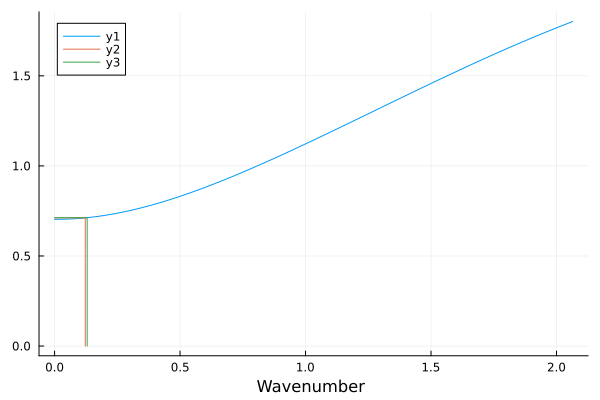

In [5]:
ωs = range(fωL(n01), stop=0.75fωₕ(n01), length=1024);
ks = [try;Roots.fzero(k->Dxwave(ω, k, n01), abs(Ω)/c);catch;missing;end for ω in ωs];

plot(ks .* c / Π, ωs ./ Π)
plot!([1, 1, 0, 1] .* ka * c / Π, [0, 1, 1, 1] .* ωa / Π)
plot!([1, 1, 0, 1] .* kb * c / Π, [0, 1, 1, 1] .* ωb / Π)
xlabel!("Wavenumber [Π / c]")
xlabel!("Frequency [Π]")
